In [1]:
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
nugen = "data/GFU/SplineMPEmax.MuEx.MC.npy"
GFU_data = "data/GFU/SplineMPEmax.MuEx.IC86-2016.npy"
LCC_path = "/Users/afrancko/Optical/SEDmWhitePaper/LC_Uli/lcs_strawman_msip6m_Ibc_nugent_detected_real_y2016.pkl"


In [54]:
f = np.load(nugen)
f_data = np.load(GFU_data)
print f_data.dtype

[('Run', '<i8'), ('Event', '<i8'), ('azimuth', '<f8'), ('zenith', '<f8'), ('ra', '<f8'), ('dec', '<f8'), ('sigma', '<f8'), ('logE', '<f8'), ('time', '<f8')]


In [55]:
print f_data['time']+2400000.5+365*1.5


[ 2458076.86815887  2458076.8691937   2458076.87234241 ...,
  2458439.16104019  2458439.16154456  2458439.16292766]


In [29]:
lc= pickle.load( open( LCC_path, "rb" ) )


In [32]:
lc.keys() # meta, lcs
print lc['meta'].keys()

['idx_orig', 'mwebv', 'hostr_v', 't0', 'hostebv', 'ra', 'amplitude', 'mwebv_sfd98', 'z', 'dec']
0.0813096997249


In [65]:
maxLC= max([max(lc['lcs'][i]['time']) for i in range(len(lc['lcs']))])
minLC= min([min(lc['lcs'][i]['time']) for i in range(len(lc['lcs']))])
 
print maxLC-minLC


180.12708


In [39]:
np.argmax(lc['lcs'][0]['time'])

35

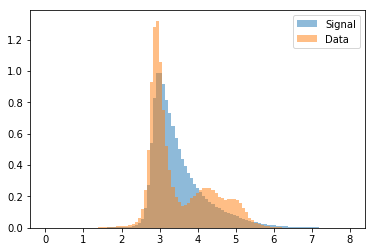

In [55]:
plt.figure()
bins = np.linspace(0.0,8,100)
gamma=-2.1
a = plt.hist(f['logE'],bins=bins, normed=True, alpha=0.5, weights=f['ow']*f['trueE']**gamma, label='Signal')
a = plt.hist(f_data['logE'],bins=bins, normed=True, alpha=0.5, label='Data')
plt.legend()

In [54]:
print f[

[ 1.90418929  2.59771935  1.56371607 ...,  1.90204974  1.51044635
  0.28134715]


In [58]:
def norm_hist(h):
    h = np.array([i / np.sum(i) if np.sum(i) > 0 else i / 1. for i in h])
    return h

In [70]:
Hs = dict()
    
mask_data = np.isfinite(f_data['zenith'])
mask = np.isfinite(f['zenith'])
#delta_mask = np.degrees(delta_psi(nuDataSig['trueZenith'], nuDataSig['trueAzimuth'], nuDataSig[zen_reco], nuDataSig[az_reco]))<5

# energy ratio 2D spline
print('Create Energy Spline..check yourself whether it is ok')
zenith_bins=list(np.linspace(-1.,0.,10, endpoint=False)) + list(np.linspace(0.,1.,8))
#tot_weight = np.sum([f[flux][mask & delta_mask] for flux in ftypes], axis=0)
#tot_weight = np.sum([nuData[flux][mask_data] for flux in ftypes, axis=0)
#tot_weight = np.sum([f_data['weight'][mask_data] for flux in ['weight']], axis=0)

#print tot_weight
    
x = np.cos(f_data['zenith'][mask_data]) 
y = f_data['logE'][mask_data]

print x, y
    
H_tot, xedges, yedges = np.histogram2d(x, y,
                                        #weights=tot_weight,
                                       bins=(zenith_bins,np.linspace(2.0, 8, 20)),
                                       normed=True)

H_tot = np.ma.masked_array(norm_hist(H_tot))
H_tot.mask = (H_tot <= 0)
 
x = np.cos(f['zenith'][mask]) 
y = f['logE'][mask]
 
H_astro, xedges, yedges = np.histogram2d(x, y,
                                        weights=f['ow'][mask]*f['trueE'][mask]**(-2.1),
                                        bins=(zenith_bins, np.linspace(2.0, 8, 20)),
                                        normed=True)
H_astro = np.ma.masked_array(norm_hist(H_astro))
H_astro.mask = (H_astro <= 0)


Create Energy Spline..check yourself whether it is ok
[-0.42013127 -0.90666258 -0.63040855 ..., -0.10360909 -0.29461578
  0.38715085] [ 2.85933961  2.61315392  2.86119457 ...,  3.00726384  2.97144888
  4.24649949]


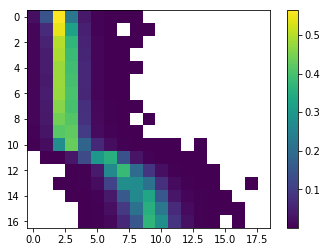

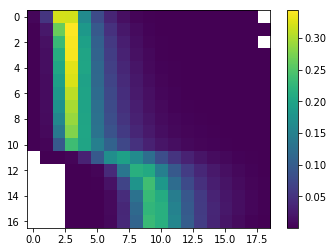

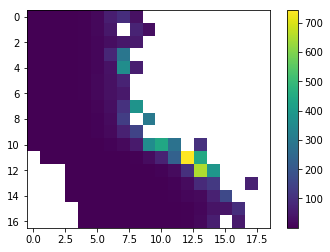

In [75]:
#plt.pcolormesh(zenith_bins, np.linspace(2.0, 8, 20), H_tot)
plt.figure()
plt.imshow(H_tot)
plt.colorbar()

plt.figure()
plt.imshow(H_astro)
plt.colorbar()

plt.figure()
plt.imshow(H_astro/H_tot)
plt.colorbar()

In [100]:
t0 = min(f_data['time']) + 100
print f_data['time'][0:10]
tmax=min(f_data['time']) + 100
mask = abs(f_data['time'] - t0)>5. #or ((f['time'])>(tmax-5) and (f['time'])<(tmax+30))
mask1 = (f_data['time']>(tmax-5))  & (f_data['time']<(tmax+30))
#mask2 = f_data['time']<(tmax+30)

#mask = np.asarray(mask)

fcut = f_data[mask | mask1]# | (mask1&mask2)]

print len(f), len(fcut)

[ 57528.86815887  57528.8691937   57528.87234241  57528.87408644
  57528.87434584  57528.87475511  57528.87601825  57528.87733405
  57528.87801159  57528.87907392]
8914490 205301


In [53]:
fdata['time'] + 2400000.5+365.

NameError: name 'fdata' is not defined

[-0.00292645 -0.00293046 -0.00294247 -0.00296244 -0.00299031 -0.00302598
 -0.00306933 -0.00312021 -0.00317846 -0.00324388 -0.00331625 -0.00339534
 -0.00348089 -0.00357262 -0.00367023 -0.00377343 -0.00388189 -0.00399527
 -0.00411323 -0.0042354  -0.00436144 -0.00449097 -0.00462362 -0.00475903
 -0.00489681 -0.0050366  -0.00517803 -0.00532074 -0.00546437 -0.00560857
 -0.00575301 -0.00589735 -0.00604127 -0.00618447 -0.00632666 -0.00646756
 -0.0066069  -0.00674444 -0.00687994 -0.00701319 -0.00714399 -0.00727215
 -0.00739752 -0.00751994 -0.00763927 -0.00775541 -0.00786826 -0.00797773
 -0.00808374 -0.00818626 -0.00828524 -0.00838065 -0.00847249 -0.00856075
 -0.00864545 -0.00872661 -0.00880426 -0.00887845 -0.00894922 -0.00901665
 -0.00908079 -0.00914173 -0.00919953 -0.00925428 -0.00930608 -0.00935501
 -0.00940117 -0.00944465 -0.00948556 -0.009524   -0.00956007 -0.00959386
 -0.00962548 -0.00965503 -0.00968261 -0.00970832 -0.00973224 -0.00975449
 -0.00977514 -0.00979428 -0.00981201 -0.00982841 -0

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

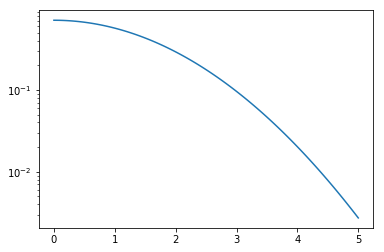

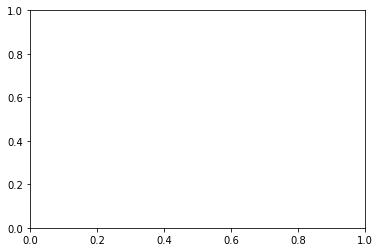

In [115]:

sigma = np.deg2rad(1.5)
dist = np.linspace(0,np.deg2rad(5),100)
S = 1./(2.*np.pi*np.rad2deg(sigma)**2)*np.exp(-dist**2 / (2.*sigma**2)) * 0.5
B = 0.05 * np.ones_like(dist)

plt.figure()
#plt.plot(dist, S)
#plt.plot(dist, B)
plt.plot(np.rad2deg(dist), S/B)
plt.yscale('log')
#plt.ylim(1e-10,1)

N = len(S)
X = 1./N * (S/B-1)

print X

ns = 0
ts = 2*np.sum(np.log(ns*X+1))

print ts

plt.figure()
plt.plot(np.rad2deg(dist), ts)


In [15]:
a = [1.,2.]
a = np.asarray(a)
b = 1.

In [16]:
print type(a), type(b)

<type 'numpy.ndarray'> <type 'float'>


In [18]:
type(b) is float

True

In [6]:
f = np.load("output/test_llh_0_2.10_0.npy")

0.497762863535
894


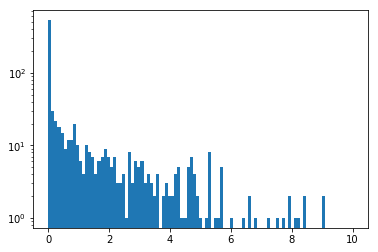

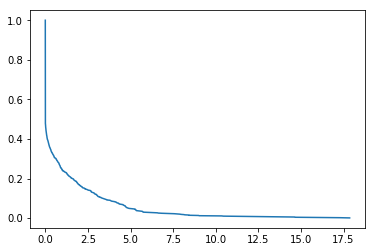

In [7]:
plt.figure()
h = plt.hist(f,bins=np.linspace(0,10,100),log=True)
print len(f[f>0])/float(len(f))
print len(f)


plt.figure()
X2 = np.sort(f)
F2 = np.ones(len(f)) - np.array(range(len(f))) / float(len(f))
plt.plot(X2, F2)


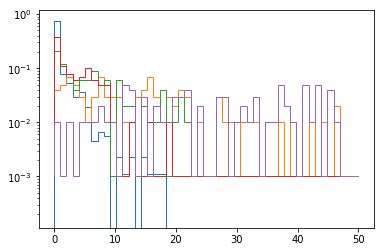

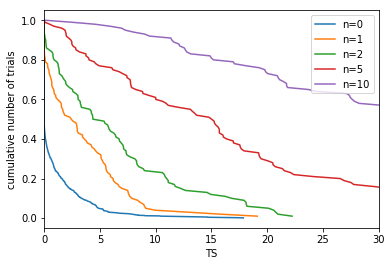

In [26]:

f0 = np.load("output/test_llh_0_2.10_0.npy")
f5 = np.load("output/test_llh_5_2.10_0.npy")
f2 = np.load("output/test_llh_2_2.10_0.npy")
f1 = np.load("output/test_llh_1_2.10_0.npy")
f10 = np.load("output/test_llh_10_2.10_0.npy")


plt.figure()
h = plt.hist(f0,bins=np.linspace(0,50,50), 
             weights=np.ones_like(f0)/float(len(f0)),histtype='step', label='n=0', log=True)
h = plt.hist(f5,bins=np.linspace(0,50,50), 
             weights=np.ones_like(f5)/float(len(f5)),histtype='step', label='n=5', log=True)
h = plt.hist(f2,bins=np.linspace(0,50,50), 
             weights=np.ones_like(f2)/float(len(f2)),histtype='step', label='n=2', log=True)
h = plt.hist(f1,bins=np.linspace(0,50,50), 
             weights=np.ones_like(f1)/float(len(f1)),histtype='step', label='n=1', log=True)
h = plt.hist(f10,bins=np.linspace(0,50,50), 
             weights=np.ones_like(f10)/float(len(f10)),histtype='step', label='n=10', log=True)


plt.figure()

farray = [f0,f1,f2,f5,f10]
l = ['n=0','n=1','n=2','n=5','n=10']

for i in range(len(farray)):

    X = np.sort(farray[i])
    F = np.ones(len(farray[i])) - np.array(range(len(farray[i]))) / float(len(farray[i]))
    plt.plot(X, F, label=l[i])

plt.xlabel('TS')
plt.ylabel('cumulative number of trials')
plt.xlim(0,30)
plt.legend()